Paramters: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

In [1]:
import pandas as pd # for data manipulation

# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for showing handwritten digits

# Skleran
from sklearn.datasets import load_digits # for MNIST data
from sklearn.manifold import Isomap # for Isomap dimensionality reduction

In [2]:
# Load digits data 
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (training data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

Shape of digit images:  (1797, 8, 8)
Shape of X (training data):  (1797, 64)
Shape of y (true labels):  (1797,)


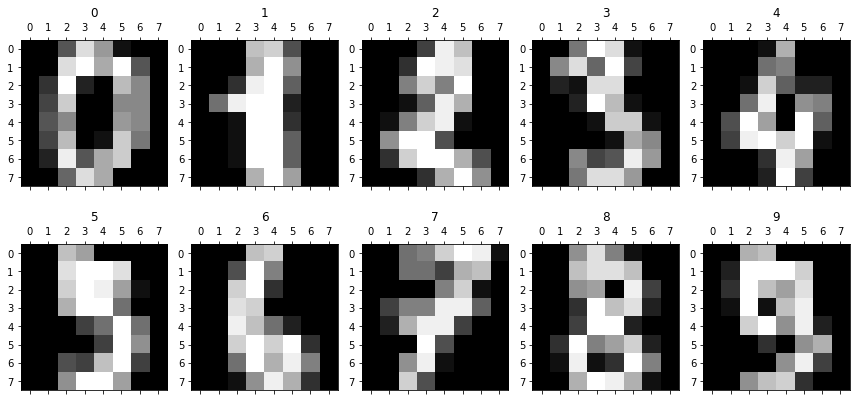

In [3]:
# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n=n+1
plt.show() 

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

Isometric Mapping
We will now apply Isomap to reduce the number of dimensions for each record in the X array from 64 to 3.

In [6]:
### Step 1 - Configure the Isomap function, note we use default hyperparameter values in this example
embed3 = Isomap(
    n_neighbors=5, # default=5, algorithm finds local structures based on the nearest neighbors
    n_components=3, # number of dimensions
    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’
    tol=0, # default=0, Convergence tolerance passed to arpack or lobpcg. not used if eigen_solver == ‘dense’.
    max_iter=None, # default=None, Maximum number of iterations for the arpack solver. not used if eigen_solver == ‘dense’.
    path_method='auto', # {‘auto’, ‘FW’, ‘D’}, default=’auto’, Method to use in finding shortest path.
    neighbors_algorithm='auto', # neighbors_algorithm{‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’
    n_jobs=-1, # n_jobsint or None, default=None, The number of parallel jobs to run. -1 means using all processors
    metric='minkowski', # string, or callable, default=”minkowski”
    p=2, # default=2, Parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
    metric_params=None # default=None, Additional keyword arguments for the metric function.
)

In [7]:
### Step 2 - Fit the data and transform it, so we have 3 dimensions instead of 64
X_trans3 = embed3.fit_transform(X)
    
### Step 3 - Print shape to test
print('The new shape of X: ',X_trans3.shape)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Admin\anacondalastone\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


The new shape of X:  (1797, 3)


In [8]:
# Create a 3D scatter plot
fig = px.scatter_3d(None, 
                    x=X_trans3[:,0], y=X_trans3[:,1], z=X_trans3[:,2],
                    color=y.astype(str),
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

As you can see, Isomap has done a wonderful job in reducing dimensions from 64 to 3 while preserving non-linear relationships. This enabled us to visualize the clusters of handwritten digits in a 3-dimensional space.

In [11]:
from sklearn.datasets import make_swiss_roll

In [20]:
#random state 42 to preserve the same values if you run it again. 
X, y = make_swiss_roll(n_samples=2000, random_state=42)

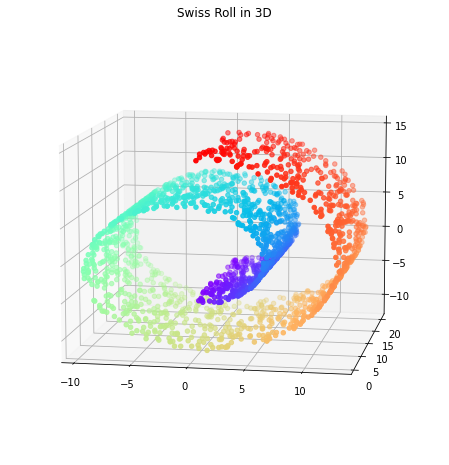

In [21]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.rainbow)
ax.view_init(10, -80)
plt.title('Swiss Roll in 3D')
plt.show()

In [14]:
from sklearn.manifold import MDS

In [28]:
X.shape

(2000, 3)

In [27]:
mds = MDS(n_components=2, dissimilarity='euclidean')

In [16]:
X

array([[-3.12117466, 14.12676288,  7.62853482],
       [ 6.1251035 , 16.73030934, 12.22394145],
       [ 6.70581101,  5.25982587, -9.47911782],
       ...,
       [ 1.67977323, 16.06812585,  7.44492217],
       [ 2.9542319 , 10.19110332,  6.83487273],
       [12.10171321,  3.13701436,  4.53995743]])

In [31]:
X_mds = mds.fit_transform(X)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



In [32]:
X_mds

array([[  4.78467139,  -8.92530012],
       [ -5.89742092, -12.85927379],
       [ -4.05277525,  13.2605609 ],
       ...,
       [ -0.79124879,   4.28249606],
       [  0.34314533,   4.01952032],
       [ -3.07642999,  -8.22100074]])

Text(0.5, 1.0, 'MDS')

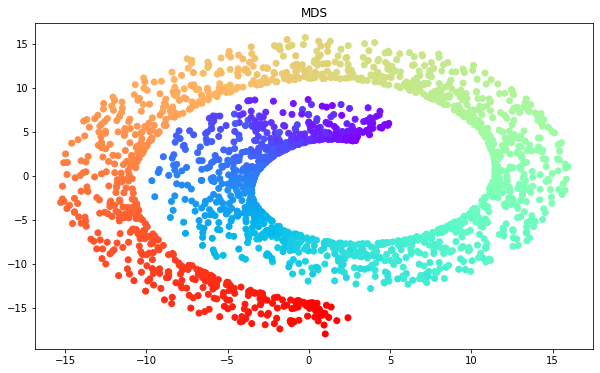

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(X_mds[:,0],X_mds[:,1], c=y, cmap=plt.cm.rainbow)
plt.title('MDS')

In [34]:
from sklearn.manifold import Isomap
#default=5, algorithm finds local structures based on the nearest neighbors
iso = Isomap(n_neighbors=5,n_components=2)

Text(0.5, 1.0, 'Isomap')

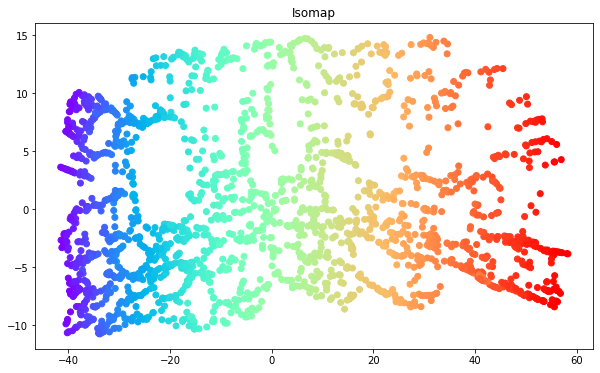

In [36]:
X_iso = iso.fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(X_iso[:,0],X_iso[:,1], c=y, cmap=plt.cm.rainbow)
plt.title('Isomap')

Looking at the ISOMAP and MDS results, it is seen that the Swiss roll can be unrolled by using ISOMAP.

As mentioned above, firstly the weighted graph is constructed -find the nearest neighbors of each sample- This is done in two ways:
k nearest neighbors
Fixed radius, define a radius value, and groups the samples which are in the radius value.
After applying one of them above, nearest neighbors are joined via weighted edges. These weights (between the neighbors) will be Euclidean distance. A fully connected weighted graph between the samples is created so far.

2. Using the Floyd Warshall algorithm or Dijkstra’s algorithm, the pairwise distance for all sample pairs in the fully connected weighted graph is calculated using geodesic distance.

3. Multidimensional Scaling (MDS) is applied to get a low dimension version.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import manifold, datasets
from matplotlib.colors import ListedColormap

In [38]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [48]:
df = pd.DataFrame(data=iris.data, 
                  columns=iris.feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [49]:
isomap = Isomap(n_components=2)

In [50]:
#the fit_tranform converts the pandas arrays into numpy arrays. 
new_dim = isomap.fit_transform(df)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

C:\Users\Admin\anacondalastone\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [51]:
new_dim.shape

(150, 2)

In [52]:
df.shape

(150, 4)

In [53]:
df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df['label'] = iris.target
df.head()

X         Y  label
0 -3.320532 -0.250339      0
1 -3.830457 -0.277493      0
2 -3.826751 -0.278952      0
3 -3.654086 -0.250781      0
4 -3.409422 -0.251514      0

In [54]:
df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

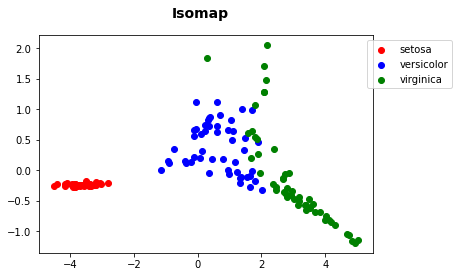

In [55]:
fig = plt.figure()
fig.suptitle('Isomap', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

plt.scatter(df[df.label == 0].X, df[df.label == 0].Y, color='red', label=iris.target_names[0])
plt.scatter(df[df.label == 1].X, df[df.label == 1].Y, color='blue', label=iris.target_names[1])
plt.scatter(df[df.label == 2].X, df[df.label == 2].Y, color='green', label=iris.target_names[2])

plt.legend(bbox_to_anchor=(1.25, 1))

In [11]:
# Cargar dataset de digitos
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [12]:
X.shape

(1797, 64)

In [13]:
y.shape

(1797,)

In [14]:
from sklearn.manifold import Isomap

In [15]:
Isomap = Isomap(n_components=3, # número de coordenadas para el colector
n_jobs = -1, # El número de trabajos paralelos a ejecutar. -1 significa utilizar todos los procesadores.
n_neighbors = 5) # número de vecinos a considerar para cada punto.

In [16]:
### Step 2 - Fit the data and transform it, so we have 3 dimensions instead of 64
X_trans3 = Isomap.fit_transform(X)
    
### Step 3 - Print shape to test
print('The new shape of X: ',X_trans3.shape)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

C:\Users\Admin\anacondalastone\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



The new shape of X:  (1797, 3)


In [17]:
# Create a 3D scatter plot
fig = px.scatter_3d(None, 
                    x=X_trans3[:,0], y=X_trans3[:,1], z=X_trans3[:,2],
                    color=y.astype(str),
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [18]:
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=3000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(3000, 20) (3000,)


In [19]:
y.shape

(3000,)

In [20]:
from sklearn.manifold import Isomap

In [21]:
iso = Isomap(n_components=3)

In [22]:
### Step 2 - Fit the data and transform it, so we have 3 dimensions instead of 64
X_trans3 = iso.fit_transform(X)
    
### Step 3 - Print shape to test
print('The new shape of X: ',X_trans3.shape)

The new shape of X:  (3000, 3)


In [23]:
# Create a 3D scatter plot
fig = px.scatter_3d(None, 
                    x=X_trans3[:,0], y=X_trans3[:,1], z=X_trans3[:,2],
                    color=y.astype(str),
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [83]:
df = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Fish.csv')

In [84]:
df.head(5)

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [86]:
import numpy as np

In [87]:
df['sex'] = np.where(df['Height']>10, 'Male', 'Female')

In [88]:
df.head(10)

Species  Weight  Length1  Length2  Length3   Height   Width   sex
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200  Male
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056  Male
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961  Male
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555  Male
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340  Male
5   Bream   450.0     26.8     29.7     34.7  13.6024  4.9274  Male
6   Bream   500.0     26.8     29.7     34.5  14.1795  5.2785  Male
7   Bream   390.0     27.6     30.0     35.0  12.6700  4.6900  Male
8   Bream   450.0     27.6     30.0     35.1  14.0049  4.8438  Male
9   Bream   500.0     28.5     30.7     36.2  14.2266  4.9594  Male

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
data_columns = ['Weight','Length1','Length2','Length3','Height','Width']

In [91]:
#scaling the data from 0 to 1. 
std_scaler = StandardScaler()
df[data_columns] = std_scaler.fit_transform(df[data_columns])

In [92]:
df.head(5)

Species    Weight   Length1   Length2   Length3    Height     Width   sex
0   Bream -0.438072 -0.305789 -0.282303 -0.106020  0.596579 -0.236529  Male
1   Bream -0.303562 -0.225507 -0.198054 -0.002337  0.821261 -0.066579  Male
2   Bream -0.163448 -0.235542 -0.179332 -0.010977  0.797341  0.165793  Male
3   Bream -0.098995  0.005302  0.054694  0.196390  0.879771  0.022621  Male
4   Bream  0.088759  0.025372  0.054694  0.239592  0.812835  0.426371  Male

In [93]:
df.shape

(159, 8)

In [94]:
### Step 1 - Configure the Isomap function, note we use default hyperparameter values in this example
isomap= Isomap(
    n_neighbors=10, # default=5, algorithm finds local structures based on the nearest neighbors
    n_components=3, # number of dimensions
    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’
    tol=0, # default=0, Convergence tolerance passed to arpack or lobpcg. not used if eigen_solver == ‘dense’.
    max_iter=None, # default=None, Maximum number of iterations for the arpack solver. not used if eigen_solver == ‘dense’.
    path_method='auto', # {‘auto’, ‘FW’, ‘D’}, default=’auto’, Method to use in finding shortest path.
    neighbors_algorithm='auto', # neighbors_algorithm{‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’
    n_jobs=-1, # n_jobsint or None, default=None, The number of parallel jobs to run. -1 means using all processors
    metric='minkowski', # string, or callable, default=”minkowski”
    p=2, # default=2, Parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
    metric_params=None # default=None, Additional keyword arguments for the metric function.
)

In [95]:
df_isomap  = isomap.fit_transform(df[data_columns])

In [96]:
import plotly.express as px # for data visualization

In [97]:
df_isomap .shape

(159, 3)

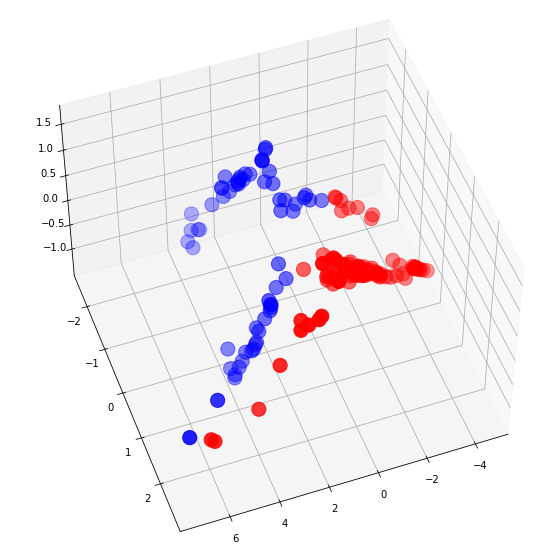

In [98]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
colors_fish = {'Male': 'b','Female':'r'}
ax.scatter3D(df_isomap[:,0],df_isomap[:,1],df_isomap[:,2],c= df['sex'].apply(lambda x:colors_fish[x]),s=200)
ax.view_init(azim=70, elev=50)

In [104]:
df[['ISO1','ISO2','ISO3']] = df_isomap

In [105]:
fig = px.scatter_3d(df,x='ISO1',y='ISO2',z='ISO3',color='sex')
fig.show()

In [106]:
fig = px.scatter_3d(df,x='ISO1',y='ISO2',z='ISO3',color='Species')
fig.show()

In [107]:
from sklearn.datasets import make_s_curve

X, Y = make_s_curve(n_samples=1000)

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import warnings
import sys

warnings.filterwarnings('ignore')

%matplotlib inline

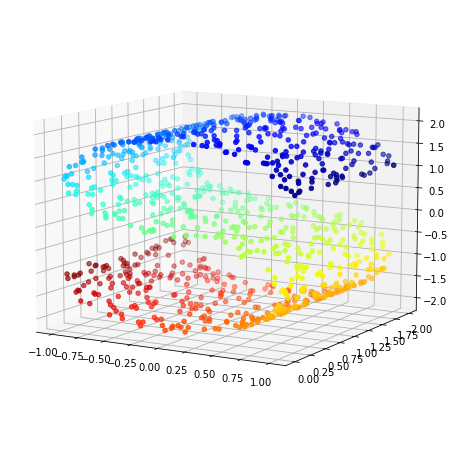

In [110]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=Y,cmap='jet')
ax.view_init(10, -60);

It can be thought of as an extension of Multi-Dimensional Scaling(MDS) or Kernel PCA. It tries to find lower dimensional embedding of the original dataset while maintaining geodesic distances between all points in the original dataset. Isomap tries to get lower dimension representation of data where points maintain geodesic distance) between them like original representation. Scikit-learn provides an implementation of Isomap as a part of the manifold module.

In [112]:
X.shape

(1000, 3)

In [113]:
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)

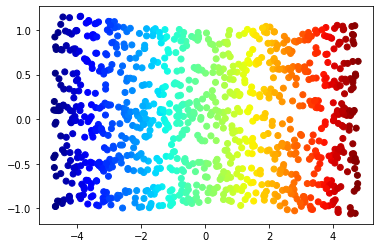

In [115]:
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=Y,cmap='jet');